## The Dataset: Open Images Embeddings

10,000 images from Open Images V7, processed through Gemma 3's vision tower.

Each image produces 256 embedding vectors (2560 dimensions each) - the "soft tokens" that get fed to the language model.

In [1]:
import duckdb
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark", font="JetBrains Mono")

In [2]:
conn = duckdb.connect("open_images/open_images_embeddings.db")
IMAGES_DIR = Path("open_images/sample/images")

### Database Schema

In [3]:
conn.sql("DESCRIBE image_token_embeddings")

┌──────────────────┬─────────────┬─────────┬─────────┬─────────┬─────────┐
│   column_name    │ column_type │  null   │   key   │ default │  extra  │
│     varchar      │   varchar   │ varchar │ varchar │ varchar │ varchar │
├──────────────────┼─────────────┼─────────┼─────────┼─────────┼─────────┤
│ image_id         │ VARCHAR     │ NO      │ PRI     │ NULL    │ NULL    │
│ token_position   │ INTEGER     │ NO      │ PRI     │ NULL    │ NULL    │
│ embedding_vector │ FLOAT[2560] │ NO      │ NULL    │ NULL    │ NULL    │
└──────────────────┴─────────────┴─────────┴─────────┴─────────┴─────────┘

### Scale

In [4]:
conn.sql("""
    SELECT 
        COUNT(DISTINCT image_id) as n_images,
        COUNT(*) as n_embeddings,
        COUNT(*) / COUNT(DISTINCT image_id) as embeddings_per_image
    FROM image_token_embeddings
""")

┌──────────┬──────────────┬──────────────────────┐
│ n_images │ n_embeddings │ embeddings_per_image │
│  int64   │    int64     │        double        │
├──────────┼──────────────┼──────────────────────┤
│    10000 │      2560000 │                256.0 │
└──────────┴──────────────┴──────────────────────┘

### Sample Images

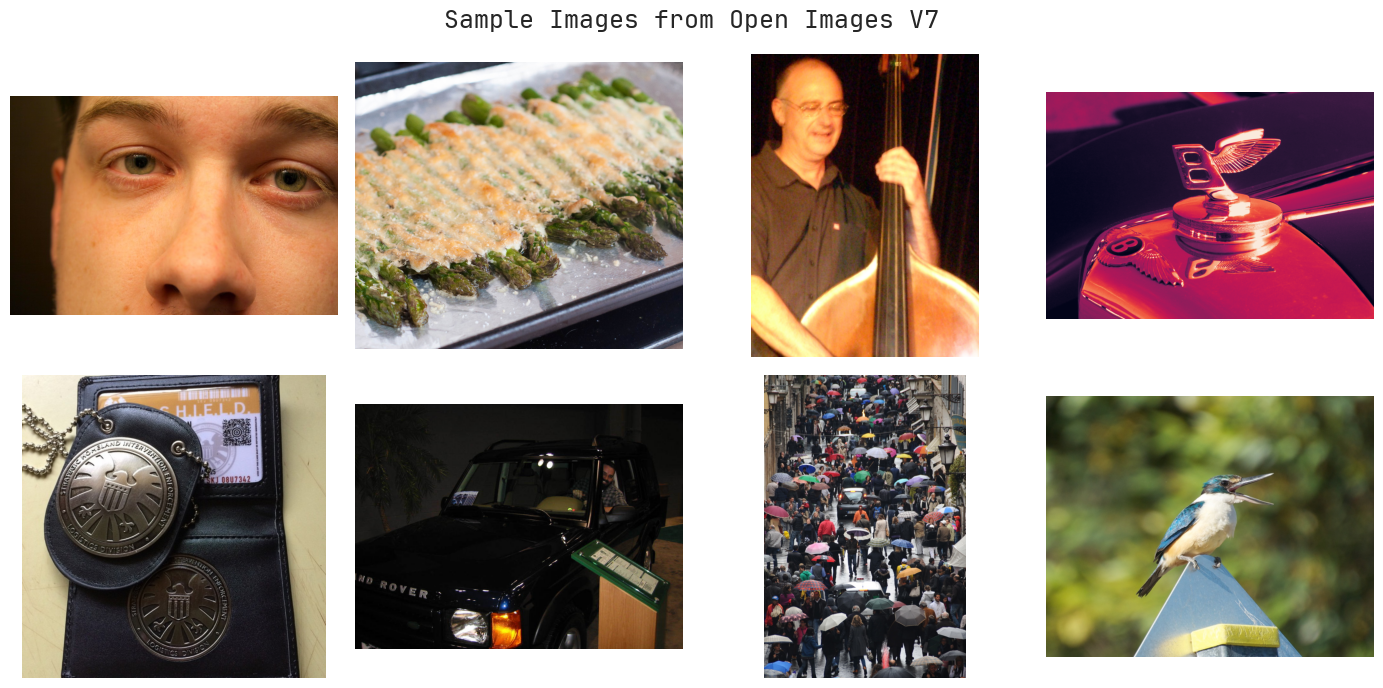

In [5]:
sample_ids = (
    conn.sql("""
        SELECT DISTINCT image_id 
        FROM image_token_embeddings 
        ORDER BY image_id DESC
        LIMIT 8
    """)
    .df()
    .image_id.tolist()
)

fig, axes = plt.subplots(2, 4, figsize=(14, 7))
for ax, image_id in zip(axes.flat, sample_ids):
    img_path = IMAGES_DIR / f"{image_id}.jpg"
    ax.imshow(Image.open(img_path))
    ax.axis("off")
plt.suptitle("Sample Images from Open Images V7", fontsize=18)
plt.tight_layout()